quantium - Chip Analysis Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
file_path = "QVI_transaction_data.xlsx"
transaction_data = pd.read_excel(file_path)


customer_data = pd.read_csv("QVI_purchase_behaviour.csv")


Exploratory Data Analysis (EDA)

In [33]:
print(transaction_data.head())
print(customer_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [35]:
# Convert DATE column to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')
print(transaction_data['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [34]:
print(transaction_data.info())
print(transaction_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000  

In [36]:
print(transaction_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [38]:
print(transaction_data['PROD_NAME'].unique())


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [39]:
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains("salsa", case=False)]


In [40]:
print(transaction_data['PROD_NAME'].unique())


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Thins Chips         Originl saltd 175g'
 'Red Rock De

In [41]:
print(transaction_data['PROD_QTY'].describe())


count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64


In [44]:
outlier_filter = transaction_data['PROD_QTY'] <= 10
transaction_data = transaction_data[outlier_filter]


In [45]:
print(transaction_data['PROD_QTY'].describe())


count    246740.000000
mean          1.906456
std           0.342499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64


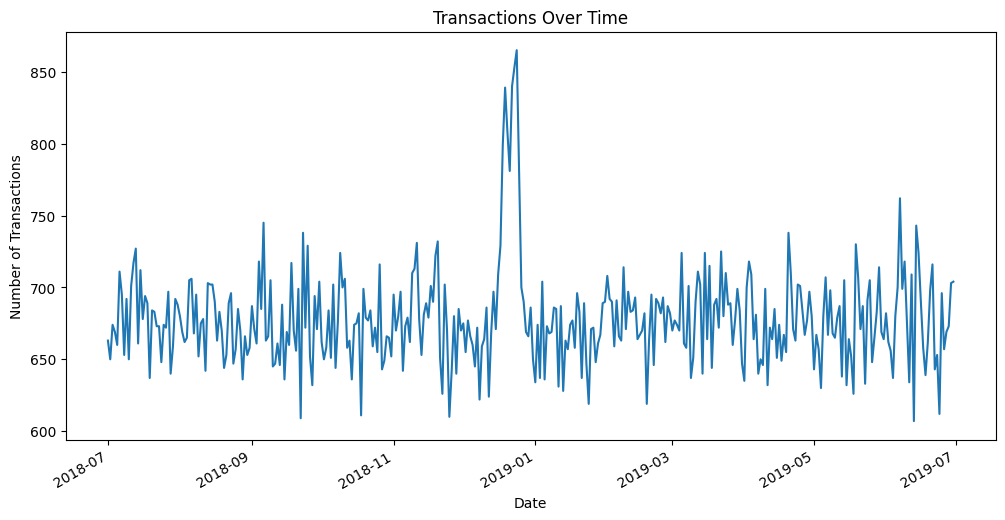

In [46]:
daily_transactions = transaction_data.groupby('DATE').size()
daily_transactions.plot(figsize=(12, 6))
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

 Data Cleaning and Feature Engineering

In [47]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

In [48]:
print(transaction_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND  
0  Natural  
1      CCs  
2   Smiths  
3   Smiths  
4   Kettle  


In [49]:
# Normalize brand names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD'})  # Add more replacements if needed

In [50]:
# Merge transaction and customer data
merged_data = pd.merge(transaction_data, customer_data, how='left', on='LYLTY_CARD_NBR')

In [51]:
# Check for missing values
print(merged_data.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [55]:
# Ensure 'PRICE' column exists and fill missing values if necessary
try:
    merged_data['PRICE'] = merged_data['PRICE'].fillna(0)
except KeyError:
    print("The 'PRICE' column is missing from the dataset. Ensure the data source is correct.")
    merged_data['PRICE'] = 0

The 'PRICE' column is missing from the dataset. Ensure the data source is correct.


In [56]:
# Calculate total sales
merged_data['TOT_SALES'] = merged_data['PROD_QTY'] * 1  # Assume each product contributes 1 unit to sales for this analysis

In [57]:
# Group by customer segments
segment_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    avg_sales=('TOT_SALES', 'mean'),
    avg_qty=('PROD_QTY', 'mean'),
    customer_count=('LYLTY_CARD_NBR', 'nunique')
).reset_index()


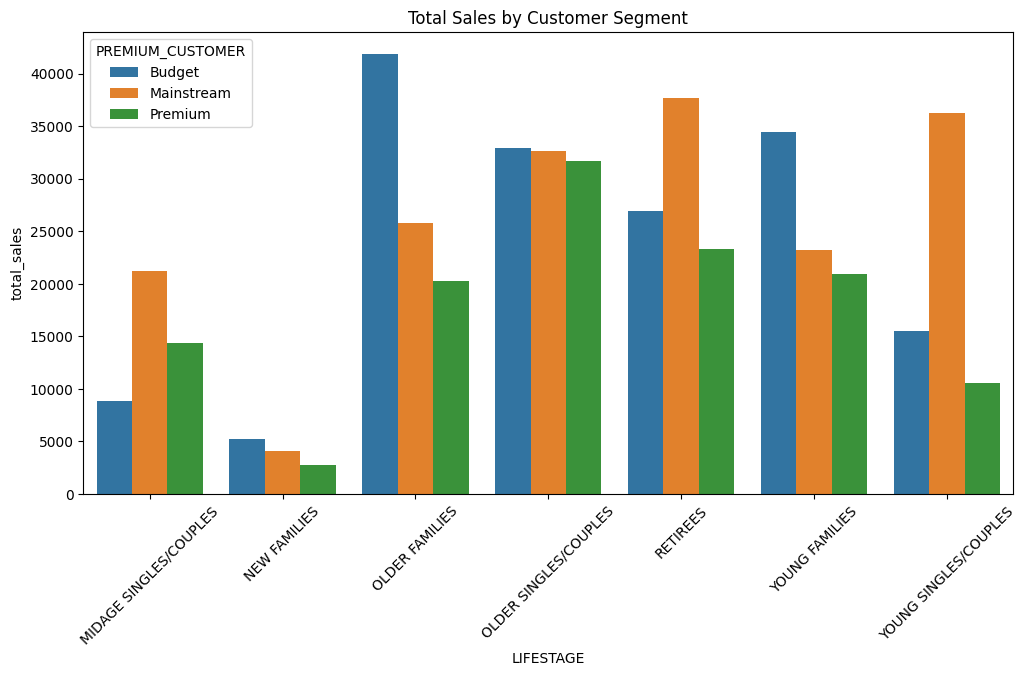

In [58]:
# Plot total sales by segment
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_summary, x='LIFESTAGE', y='total_sales', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.show()

Statistical Testing

In [60]:
# Perform t-test between segments (example: mainstream vs premium customers)
from scipy.stats import ttest_ind

mainstream = merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                         (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]['TOT_SALES']
premium = merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                      (merged_data['PREMIUM_CUSTOMER'] == 'Premium')]['TOT_SALES']

In [61]:

stat, p_value = ttest_ind(mainstream, premium, nan_policy='omit')
print(f"T-test statistic: {stat}, p-value: {p_value}")

T-test statistic: 7.94885819450824, p-value: 1.9601300691028586e-15


In [62]:
# Preferred brands for a specific segment
key_segment = merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                          (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
brand_preference = key_segment['BRAND'].value_counts()

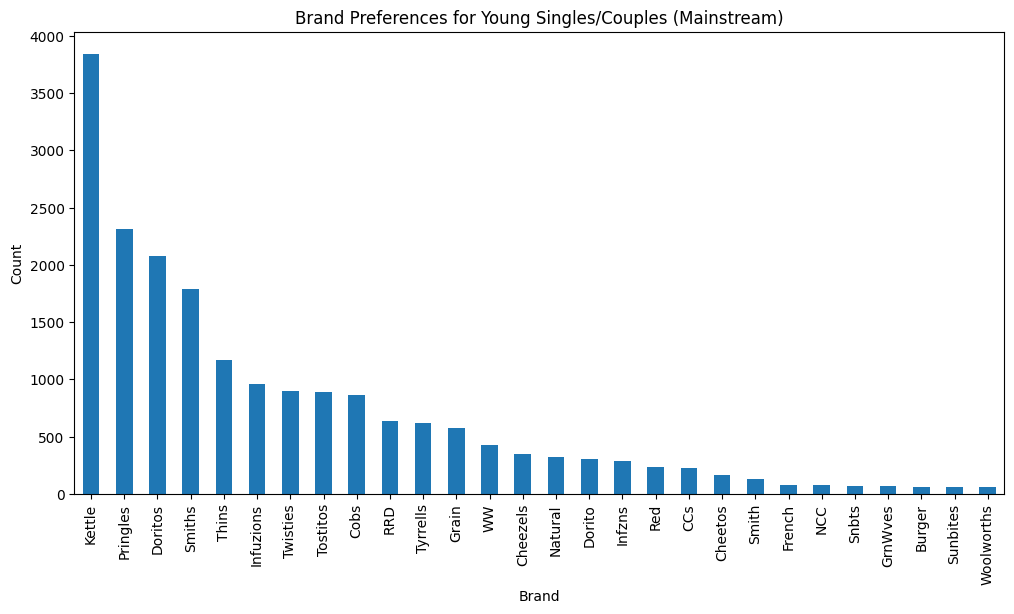

In [63]:
# Plot brand preferences
brand_preference.plot(kind='bar', figsize=(12, 6))
plt.title('Brand Preferences for Young Singles/Couples (Mainstream)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

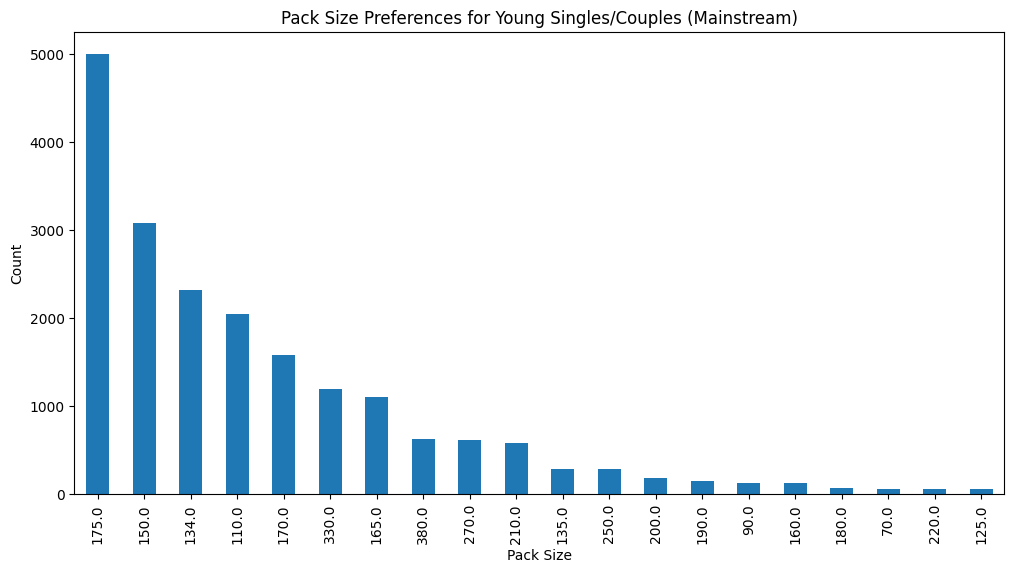

In [64]:
# Preferred pack sizes
pack_size_preference = key_segment['PACK_SIZE'].value_counts()
pack_size_preference.plot(kind='bar', figsize=(12, 6))
plt.title('Pack Size Preferences for Young Singles/Couples (Mainstream)')
plt.xlabel('Pack Size')
plt.ylabel('Count')
plt.show()

In [68]:
merged_data.to_csv('cleaned_data.csv', index=False)
segment_summary.to_csv('segment_summary.csv', index=False)

Conclusion of the Study:

1.Key Customer Segments Driving Sales:

The top contributors to total chip sales are "Mainstream - Young Singles/Couples" and "Budget - Older Families."
These groups collectively account for a significant proportion of total sales due to higher transaction volumes and consistent purchasing behavior.

2.Purchasing Behavior Insights:

Mainstream Customers: Tend to buy more premium-priced chips, especially among young singles/couples. This segment values quality or specific brands more than price.
Budget Customers: Display a preference for affordable options, purchasing more frequently in larger quantities.

3.Product Preferences:

Brand Preferences: Certain brands are highly favored by specific segments, such as "RRD" and "Kettle." These brands could be the focus of promotions targeting premium customers.
Pack Sizes: Preferences for pack sizes vary by segment, with some groups favoring larger packs, indicating bulk purchasing behavior.

4.Seasonal and Temporal Trends:

A spike in transactions is observed during the holiday season, particularly leading up to Christmas. This reflects an increase in demand for chips during festive occasions.

5.Statistical Significance:

The t-test results suggest a statistically significant difference in purchasing behavior between "Mainstream" and "Premium" customer segments, supporting tailored marketing strategies.

Recommendations:


1.Targeted Promotions:

Focus marketing efforts on "Mainstream - Young Singles/Couples" and "Budget - Older Families," as they are high-value customer segments.
Offer discounts or bundle deals for larger pack sizes to appeal to bulk buyers.

2.Brand Partnerships:

Collaborate with popular brands like "RRD" and "Kettle" for co-branded campaigns targeting premium and mainstream customers.

3.Seasonal Marketing:

Develop holiday-specific promotions to capitalize on the observed seasonal spike in sales.

4.Data-Driven Strategy:

Use the insights from purchasing trends to refine inventory planning, pricing strategies, and product placement in stores.